# Gráfico Animado % CPU
Neste notebook, vamos criar um gráfico que mostra em tempo real a porcentagem de uso da CPU utilizando as bibliotecas matplotlib e psutil.  

Link do Projeto no Github: https://github.com/juliomrodrigues/Grafico-Uso-CPU

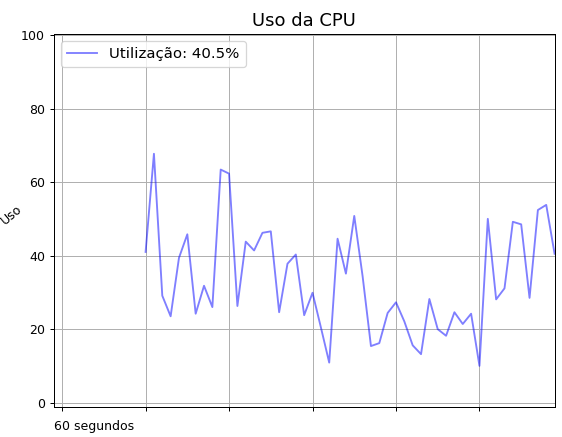

Documentação das Bibliotecas:
- Matplolib -> https://matplotlib.org/stable/index.html
- Psutil -> https://psutil.readthedocs.io/en/latest/  

### Antes de Começar:
- **%matplotlib notebook**
Usamos esse comando para permitir que façamos interações coma as Figuras criadas(Zoom, Resize etc). Após executado, ele é válido para todas as outras células do notebook.

In [42]:
%matplotlib notebook

## 1.0 - Importações que Vamos Precisar:

In [43]:
# Gráficos
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Função que retorna a porcentagem de uso da CPU
from psutil import cpu_percent

## 1.1 - cpu_percent()
- A função cpu_percent() nos retorna a procentagem de uso da CPU toda vez que é chamada.

In [44]:
cpu_percent()

35.5

## 2.0 - Criando a Figura e os Eixos:
Todos os resultados serão exibidos nessa figura. Sempre vez que fizer uma alteração, observe se a figura foi atualizada corretamente.  
(Ex: parâmetros incorretos podem fazer com que ela fique interamente branca e não funcional)

<IPython.core.display.Javascript object>


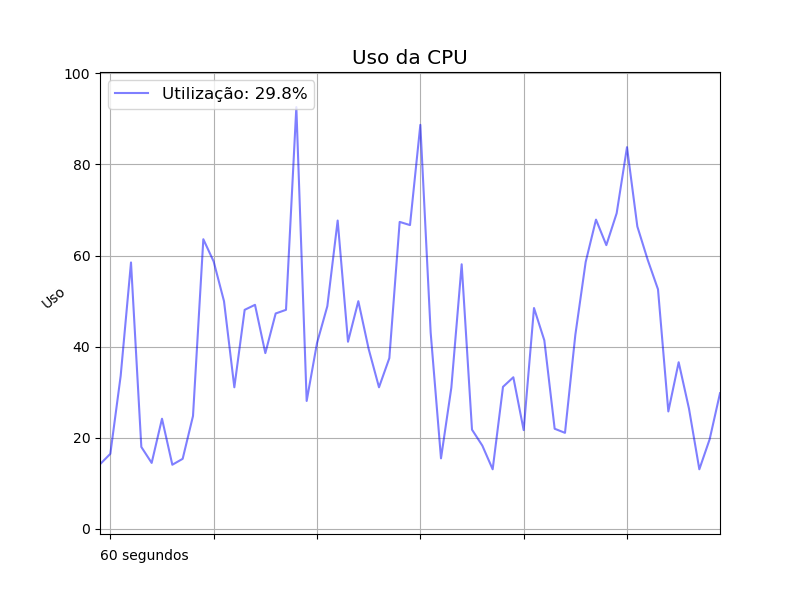

In [45]:
x , y = [], []
fig, ax = plt.subplots(figsize=(8,6))
line, = ax.plot([], [])

## 2.1 - Adicionando Informações:
- **Com a figura e os eixos criados precisamos passar algumas informações para melhorar o entendimento do gráfico como:**
    1. Legendas;
    2. Limites dos eixos x e y;
    3. Tamanho da fonte dos textos;
    4. Título.

In [46]:
ax.set(xlim=(-60,0), ylim=(-1.1, 100.3)) # Limites dos eixos x,y
ax.set_xticklabels([]) # Apagando os valores do eixo x(ele continua funcionando.)
ax.grid(True) # Adicionando grade no fundo

# Setando textos para os eixos, legenda, e titútlo do gráfico
ax.set_ylabel('Uso', rotation=40)
ax.set_xlabel('60 segundos', loc='left')
ax.legend(['% Atual'], loc='upper left')
ax.set_title('Uso da CPU', fontsize='x-large');

### Observações: 
- O eixo foram setados com limites um pouco maior do que o necessário(Ex: 100.1 ao invés de 100). Isso serve pra deixar uma folga nas bordas caso algum ponto X,Y esteja no limite. Achei visualmente agradável, mas não é algo necessário.  
- Também não é necessário esconder os valores do eixo X(efeito apenas visual pois o eixo estará se movimentando).

## 3.0 Init Function:
A função a seguir será chamada uma única vez pela FuncAnimation() no inicio. Aproveitei para setar os valores que serão passados para linha e atualizados constatemente. Também estou personalizando a cor da linha

In [47]:
def init():
    # Setando valores da linha
    line.set_data([],[]) 
    
    # Cor da linha e intensidade da cor
    line.set_color('blue')
    line.set_alpha(0.5)
    return line,

## 3.1 Animate Function:
A função a seguir será chamada repetidas vezes pela FuncAnimation() para efetivamente gerar a animação na nossa figura criada acima. Portanto, é necessário atualizar os valores da linha e "seta-los" novamente.

In [48]:
def animate(i):
    x.append(i)
    y.append(cpu_percent())
    line.set_data(x[:], y[:])
    ax.legend(['Utilização: {}%'.format(y[i])], loc='upper left', fontsize='large')
    
    # Movimentando eixo x
    ax.set_xlim(-60+x[i], 0+x[i])
    return line,

**Adicional:** 
- Também é importante movimentar o eixo **x** para que consigamos acompanhar as atualizações. Não existe necessidade de usar os mesmos valores que eu usei. Apenas achei visualmente confortável de assistir se a movimentação nesse ritmo.

## 4.0 FuncAnimation()
Aqui finalmente chamamos a FuncAnimation e passamos a figura, a função que será chamada repetidas vezes para animar a figura, o número de frames/execuções, o intervalo entre cada uma delas(1 segundo) etc..

Para conhecer melhor os parametros passados, você pode consultar a documentação aqui: 
- FuncAnimation -> https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html?highlight=funcanimation#matplotlib.animation.FuncAnimation

In [49]:
animation = FuncAnimation(fig, animate, frames=70, interval=1000, blit=True, init_func=init)

## 5.0 Resultados
Com todas as etapas anteriores feitas, basta usar o método show() para exibir os resultados.  
Execute a célula a seguir e suba a tela e volta para a Figura que criamos no início para visualizar o gráfico funcionando

In [50]:
plt.show()

## 6.0 Exportando Gif

In [41]:
animation.save('grafico_cpu_uso1.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
